# Sentiment Analysis of Real-time Flipkart Product Reviews

## Objective:

### The objective of this project is to classify customer reviews as positive or negative and understand the pain points of customers who write negative reviews. By analyzing the sentiment of reviews, we aim to gain insights into product features that contribute to customer satisfaction or dissatisfaction.


# Importing required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading csv using pandas

In [2]:
df = pd.read_csv('data.csv')

# Displaying First 5 rows:

In [3]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [4]:
df.describe()

,Up Votes,Down Votes,Ratings
count,8508.000000,8508.000000,8518.000000
mean,0.391396,0.121768,4.181028
std,11.613909,3.248022,1.262200
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,4.000000
50%,0.000000,0.000000,5.000000
75%,0.000000,0.000000,5.000000
max,889.000000,219.000000,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


# Checking Null values in the data

In [6]:
df.isnull().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

# Handling Null values:

In [7]:
df['Review text'].fillna(df['Review text'].mode()[0],inplace=True)

In [8]:
df.isnull().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          0
Ratings              0
dtype: int64

# Check for duplicate values and removing them:

In [9]:
df.duplicated().sum()

4

In [10]:
df = df.drop_duplicates()

In [11]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


# Ploting the Ratings Data:

<Axes: xlabel='Ratings', ylabel='count'>

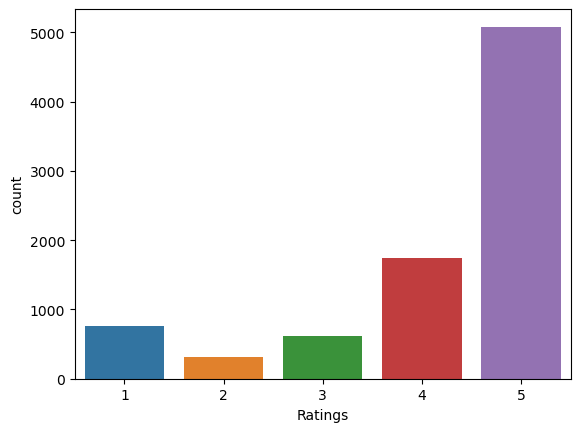

In [12]:
sns.countplot(x='Ratings', data=df)

# Ratings categorised into positive and negative

In [13]:
df['label'] = df['Ratings'].apply(lambda x: 'positive' if x >= 3 else 'negative')

# Identifying Input and Output variables

### Independent variable

In [14]:
X=df[['Review text']]

### Target/Dependent variable

In [15]:

y=df[['label']]

# Train-Test Split

In [16]:
from sklearn.model_selection import train_test_split

## Training data is 80% of total data and Test data is 20% of total data

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state=35)

In [18]:
X_train

,Review text
337,"Very good shutles ,READ MORE"
3460,OkREAD MORE
4793,not badREAD MORE
7747,"Good quality,delivered earlier than expected d..."
5333,okay okay shuttlesREAD MORE
...,...
3321,Great and perfect with no defectREAD MORE
3007,Quality is not goodREAD MORE
7148,these shuttles are as good as feather shuttle ...
1295,Good shuttlecockREAD MORE


In [19]:
y_train

,label
337,positive
3460,positive
4793,negative
7747,positive
5333,positive
...,...
3321,positive
3007,negative
7148,positive
1295,positive


In [20]:
X_test

,Review text
7890,Just greatREAD MORE
1587,Original . Awesome. Love to FlipkartREAD MORE
6624,Very bad quality shuttle.....and very very pat...
8269,GoodREAD MORE
8079,Shuttle is goodREAD MORE
...,...
6863,niceREAD MORE
334,GoodREAD MORE
3291,Good qualityREAD MORE
987,One of the best shuttle for outdoor playREAD MORE


In [21]:
y_test

,label
7890,positive
1587,positive
6624,positive
8269,positive
8079,positive
...,...
6863,positive
334,positive
3291,positive
987,positive


# Data Preprocessing of Train data and Test data

In [22]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [23]:
stem = PorterStemmer()

In [24]:
lemma = WordNetLemmatizer()

In [25]:
def preprocess(data):
    
    # removes special characters
    sentence = re.sub("[^a-zA-Z]"," ",data)
    
    # converts words to lowercase
    sentence = sentence.lower()
    
    # tokenization
    sentence = sentence.split()
    
    #removes the stop words
    sentence = [word for word in sentence if word not in stopwords.words('english')]
    
    # can apply stem or lemm
    # applying lemmatization
    sentence = [lemma.lemmatize(word) for word in sentence]
    
    sentence=  " ".join(sentence)
    
    return sentence

## Applying preprocesing on train_data

In [26]:
X_train= X_train['Review text'].apply(preprocess)

## Applying preprocesing on test data

In [27]:
X_test = X_test['Review text'].apply(preprocess)

# CountVectorizer

## Converting Text data to Numerical data

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
cv = CountVectorizer()

In [30]:
%time X_train_num = cv.fit_transform(X_train)

CPU times: user 22.1 ms, sys: 1.2 ms, total: 23.3 ms
Wall time: 22.1 ms


In [31]:
%time X_test_num = cv.transform(X_test)

CPU times: user 4.62 ms, sys: 145 µs, total: 4.77 ms
Wall time: 4.56 ms


# Model Building:

## 1. LogisticRegression

In [32]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train_num, y_train)

/Users/eleshalapravalika/Downloads/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [33]:
y_train_pred = lr_model.predict(X_train_num)

In [34]:
y_pred=lr_model.predict(X_test_num)

In [35]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

0.9271873165002936
              precision    recall  f1-score   support

    negative       0.81      0.53      0.64       208
    positive       0.94      0.98      0.96      1495

    accuracy                           0.93      1703
   macro avg       0.87      0.76      0.80      1703
weighted avg       0.92      0.93      0.92      1703



In [36]:
train_score=accuracy_score(y_train,y_train_pred)
train_score

0.9422992218470122

In [37]:
test_score=accuracy_score(y_pred,y_test)
test_score

0.9271873165002936

## 2. Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_num, y_train)

/Users/eleshalapravalika/Downloads/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [39]:
y_train_pred = rf_model.predict(X_train_num)

In [40]:
y_pred=lr_model.predict(X_test_num)

In [41]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

0.9271873165002936
              precision    recall  f1-score   support

    negative       0.81      0.53      0.64       208
    positive       0.94      0.98      0.96      1495

    accuracy                           0.93      1703
   macro avg       0.87      0.76      0.80      1703
weighted avg       0.92      0.93      0.92      1703



In [42]:
train_score=accuracy_score(y_train,y_train_pred)
train_score

0.9781236235501395

In [43]:
test_score=accuracy_score(y_pred,y_test)
test_score

0.9271873165002936

## 3. Naive Bayes

In [44]:
from sklearn.naive_bayes import MultinomialNB

In [45]:
nb_model= MultinomialNB()

In [46]:
nb_model.fit(X_train_num,y_train)

/Users/eleshalapravalika/Downloads/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

## Evaluation of Naive Bayes Model:

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [48]:
y_train_pred = nb_model.predict(X_train_num)
y_train_pred

array(['positive', 'positive', 'positive', ..., 'positive', 'positive',
       'positive'], dtype='<U8')

In [49]:
train_score=accuracy_score(y_train,y_train_pred)
train_score

0.931874908236676

In [50]:
y_pred=nb_model.predict(X_test_num)
y_pred

array(['positive', 'positive', 'negative', ..., 'positive', 'positive',
       'positive'], dtype='<U8')

In [51]:
test_score=accuracy_score(y_pred,y_test)
test_score

0.9242513211978861

## Confusion Matrix

In [52]:
confusion_matrix(y_train, y_train_pred)

array([[ 509,  357],
       [ 107, 5838]])

Text(0.5, 23.52222222222222, 'Predicted')

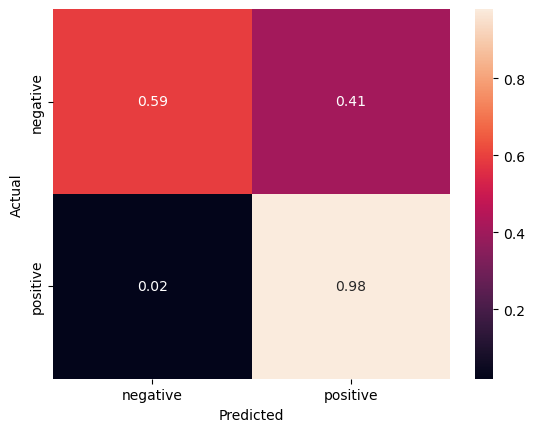

In [53]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_train, y_train_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

Text(0.5, 23.52222222222222, 'Predicted')

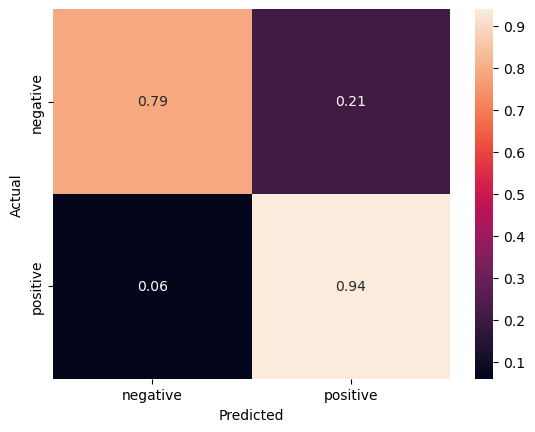

In [54]:
cm = confusion_matrix(y_pred,y_test)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Implementing various Algorithms to find the Best Model

In [55]:
from joblib import Memory
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from gensim.models import Word2Vec
from sklearn.metrics import f1_score

In [56]:
import warnings
warnings.filterwarnings('ignore')

# Defining a memory object to cache Intermediate results

In [57]:
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
        'vectorization': [CountVectorizer(),TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ]
}

# Perform GridSearchCV for each algorithm

best_models = {}

for algo in pipelines.keys():
    print("*" * 10, algo, "*" * 10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='f1',  
                               return_train_score=True,
                               verbose=1)
    
    grid_search.fit(X_train, y_train)
    best_models[algo] = grid_search.best_estimator_
    y_pred = grid_search.best_estimator_.predict(X_test)
    f1 = f1_score(y_test, y_pred, pos_label='positive')  
    print('F1 Score on Test Data:', f1)

********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
F1 Score on Test Data: 0.9548302011210024
********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
F1 Score on Test Data: 0.938337801608579
********** logistic_regression **********
Fitting 5 folds for each of 72 candidates, totalling 360 fits
F1 Score on Test Data: 0.9360525406152783


In [58]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization', CountVectorizer(max_features=1000)),
                ('classifier', MultinomialNB(alpha=1))])

decision_tree
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization', CountVectorizer(max_features=1000)),
                ('classifier', DecisionTreeClassifier())])

logistic_regression
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization', CountVectorizer(max_features=1000)),
                ('classifier',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    l1_ratio=0.4, penalty='elasticnet',
                                    solver='saga'))])



In [59]:
import joblib
import os

In [60]:
from sklearn.metrics import f1_score

In [61]:
save_dir = '/Users/eleshalapravalika/Downloads/ML-Project/reviews_data_dump/reviews_badminton/Models'

for name, model in best_models.items():
    print("*" * 10, name, "*" * 10)
    
    joblib.dump(model, os.path.join(save_dir, f'{name}.pkl'))
    loaded_model = joblib.load(os.path.join(save_dir, f'{name}.pkl'))
    
    %time y_test_pred = loaded_model.predict(X_test)

    f1 = f1_score(y_test, y_test_pred, pos_label='positive')

    print("F1 Score (Positive Class):", f1)
    print("Model Size:", os.path.getsize(os.path.join(save_dir, f'{name}.pkl')), "Bytes")

********** naive_bayes **********
CPU times: user 5.36 ms, sys: 61 µs, total: 5.42 ms
Wall time: 5.43 ms
F1 Score (Positive Class): 0.9548302011210024
Model Size: 86294 Bytes
********** decision_tree **********
CPU times: user 6.28 ms, sys: 18 µs, total: 6.3 ms
Wall time: 6.3 ms
F1 Score (Positive Class): 0.938337801608579
Model Size: 247720 Bytes
********** logistic_regression **********
CPU times: user 5.39 ms, sys: 19 µs, total: 5.41 ms
Wall time: 5.42 ms
F1 Score (Positive Class): 0.9360525406152783
Model Size: 62569 Bytes
